## Sentiment Analysis

Skipping file with no data: youtube_comments_YoLICmlVC2c.csv
Skipping file with no data: youtube_comments_1JbcfnuOLeA.csv
Skipping file with no data: youtube_comments_EhjK7P3uboE.csv
Skipping file with no data: youtube_comments_kRh6598RmHM.csv
Skipping file with no data: youtube_comments_fiIT7zrg-oM.csv
Skipping file with no data: youtube_comments_xeWSUz_tRzE.csv
Skipping file with no data: youtube_comments_Hr551AGISXQ.csv
Skipping file with no data: youtube_comments_faRdmt3My70.csv
Skipping file with no data: youtube_comments_T2K-K3xDE8Y.csv
Skipping file with no data: youtube_comments_Z2d7peX8n04.csv
Skipping file with no data: youtube_comments_tnGaMNvMqvU.csv
Skipping file with no data: youtube_comments_-a-elTAJMtI.csv
Skipping file with no data: youtube_comments_m7-IyjWCZY0.csv
Skipping file with no data: youtube_comments_yARHguIg2k0.csv
Skipping file with no data: youtube_comments_heD-px37WFE.csv
Skipping file with no data: youtube_comments_qK2Zn5oCCq8.csv
Skipping file with no da

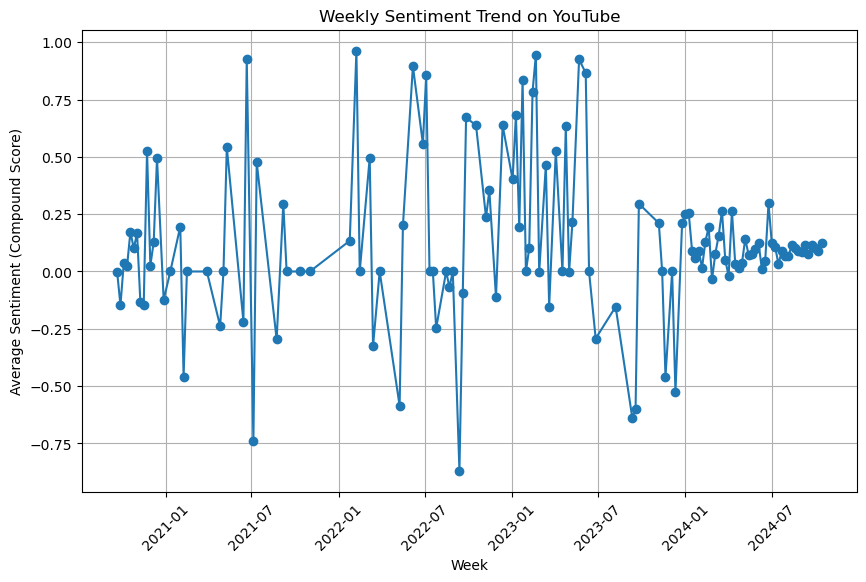

In [14]:
import pandas as pd
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Define the folder where the comment files are stored
comments_folder = 'youtube_data'

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to load all YouTube comments from the CSV files
def load_youtube_comments(comments_folder):
    all_comments = pd.DataFrame()

    for file_name in os.listdir(comments_folder):
        if file_name.startswith('youtube_comments_') and file_name.endswith('.csv'):
            file_path = os.path.join(comments_folder, file_name)
            try:
                video_comments = pd.read_csv(file_path)
                if not video_comments.empty:  # Check if the file is not empty
                    all_comments = pd.concat([all_comments, video_comments], ignore_index=True)
                else:
                    print(f"Skipping empty file: {file_name}")
            except pd.errors.EmptyDataError:
                print(f"Skipping file with no data: {file_name}")
    
    return all_comments

# Load the YouTube comments
youtube_comments_df = load_youtube_comments(comments_folder)

# Convert the 'published_at' column to datetime using ISO 8601 format
youtube_comments_df['published_at'] = pd.to_datetime(youtube_comments_df['published_at'], errors='coerce', format='%Y-%m-%dT%H:%M:%SZ')

# Drop rows where 'published_at' could not be converted (NaT values)
youtube_comments_df = youtube_comments_df.dropna(subset=['published_at'])

# Apply VADER sentiment analysis
def apply_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# Add sentiment score to the DataFrame
youtube_comments_df['sentiment'] = youtube_comments_df['text'].apply(lambda x: apply_sentiment(str(x)))

# Extract the week number for weekly grouping
youtube_comments_df['week'] = youtube_comments_df['published_at'].dt.to_period('W').apply(lambda r: r.start_time)

# Group by week and calculate the average sentiment per week
weekly_sentiment_youtube = youtube_comments_df.groupby('week')['sentiment'].mean().reset_index()

# Plot the trend of weekly sentiment for YouTube data
plt.figure(figsize=(10, 6))
plt.plot(weekly_sentiment_youtube['week'], weekly_sentiment_youtube['sentiment'], marker='o')
plt.title('Weekly Sentiment Trend on YouTube')
plt.xlabel('Week')
plt.ylabel('Average Sentiment (Compound Score)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

[nltk_data] Downloading package stopwords to /Users/nigel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nigel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 most frequent words:
trump: 17260
vote: 6244
people: 5906
harris: 4988
like: 4112
kamala: 4108
one: 3709
jesus: 3706
president: 3554
biden: 3434


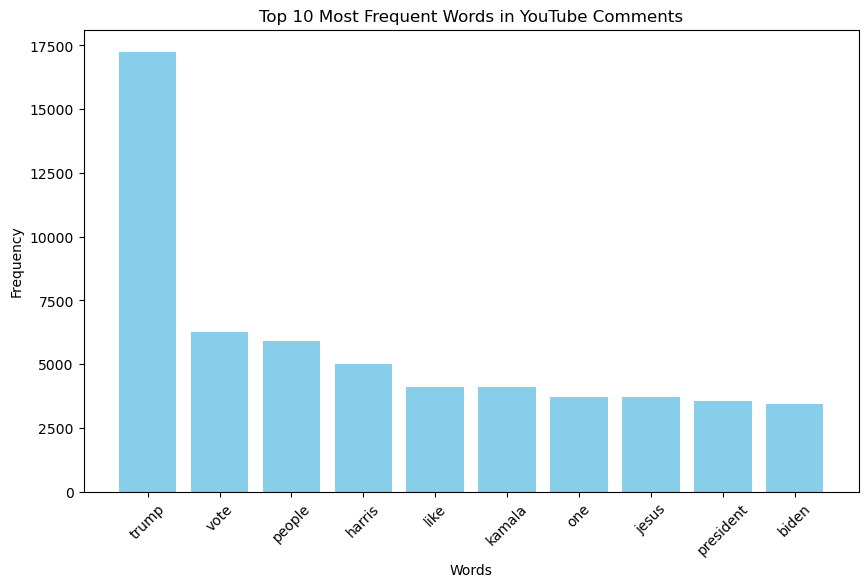

In [16]:
import pandas as pd
import re
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Initialize stopwords set
stop_words = set(stopwords.words('english'))

# Define a function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    return text

# Apply the cleaning function to the 'text' column
youtube_comments_df['cleaned_text'] = youtube_comments_df['text'].apply(lambda x: clean_text(str(x)))

# Tokenize the text and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove non-alphabetical tokens and stopwords
    return tokens

youtube_comments_df['tokens'] = youtube_comments_df['cleaned_text'].apply(tokenize_and_remove_stopwords)

# Flatten all tokens into a single list
all_tokens = [word for tokens in youtube_comments_df['tokens'] for word in tokens]

# Count the frequency of each word
word_counts = Counter(all_tokens)

# Get the top k most frequent words
k = 10  # You can set k to any number you like
top_k_words = word_counts.most_common(k)

# Display the top k words
print(f"Top {k} most frequent words:")
for word, count in top_k_words:
    print(f"{word}: {count}")

# Plotting the word frequency histogram
words, counts = zip(*top_k_words)  # Unzip the words and counts

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title(f"Top {k} Most Frequent Words in YouTube Comments")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

## Topic Modelling

[nltk_data] Downloading package stopwords to /Users/nigel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Skipping file with no data: youtube_comments_YoLICmlVC2c.csv
Skipping file with no data: youtube_comments_1JbcfnuOLeA.csv
Skipping file with no data: youtube_comments_EhjK7P3uboE.csv
Skipping file with no data: youtube_comments_kRh6598RmHM.csv
Skipping file with no data: youtube_comments_fiIT7zrg-oM.csv
Skipping file with no data: youtube_comments_xeWSUz_tRzE.csv
Skipping file with no data: youtube_comments_Hr551AGISXQ.csv
Skipping file with no data: youtube_comments_faRdmt3My70.csv
Skipping file with no data: youtube_comments_T2K-K3xDE8Y.csv
Skipping file with no data: youtube_comments_Z2d7peX8n04.csv
Skipping file with no data: youtube_comments_tnGaMNvMqvU.csv
Skipping file with no data: youtube_comments_-a-elTAJMtI.csv
Skipping file with no data: youtube_comments_m7-IyjWCZY0.csv
Skipping file with no data: youtube_comments_yARHguIg2k0.csv
Skipping file with no data: youtube_comments_heD-px37WFE.csv
Skipping file with no data: youtube_comments_qK2Zn5oCCq8.csv
Skipping file with no da

Processing comments: 100%|████████████| 55190/55190 [00:00<00:00, 115091.38it/s]


Preprocessing the text data...


Preprocessing documents: 100%|███████████| 55190/55190 [01:51<00:00, 496.80it/s]


Starting parameter tuning for dictionary and topic number...

Tuning Dictionary with no_below=5, no_above=0.1
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [07:51<00:00, 36.29s/it]


Best Coherence so far: 0.5466556048093576 with params {'no_below': 5, 'no_above': 0.1, 'num_topics': 2}

Tuning Dictionary with no_below=5, no_above=0.2
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [08:01<00:00, 37.02s/it]


Best Coherence so far: 0.5787970438893643 with params {'no_below': 5, 'no_above': 0.2, 'num_topics': 2}

Tuning Dictionary with no_below=5, no_above=0.3
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [08:16<00:00, 38.22s/it]


Best Coherence so far: 0.5852173808918013 with params {'no_below': 5, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=5, no_above=0.5
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [08:33<00:00, 39.50s/it]


Best Coherence so far: 0.5852173808918013 with params {'no_below': 5, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=5, no_above=0.6
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [09:38<00:00, 44.47s/it]


Best Coherence so far: 0.5852173808918013 with params {'no_below': 5, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=10, no_above=0.1
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [07:24<00:00, 34.19s/it]


Best Coherence so far: 0.5852173808918013 with params {'no_below': 5, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=10, no_above=0.2
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [07:31<00:00, 34.76s/it]


Best Coherence so far: 0.5852173808918013 with params {'no_below': 5, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=10, no_above=0.3
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [07:57<00:00, 36.73s/it]


Best Coherence so far: 0.5852173808918013 with params {'no_below': 5, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=10, no_above=0.5
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [07:49<00:00, 36.09s/it]


Best Coherence so far: 0.5852173808918013 with params {'no_below': 5, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=10, no_above=0.6
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [07:48<00:00, 36.05s/it]


Best Coherence so far: 0.5852173808918013 with params {'no_below': 5, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=20, no_above=0.1
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [07:49<00:00, 36.13s/it]


Best Coherence so far: 0.5852173808918013 with params {'no_below': 5, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=20, no_above=0.2
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [07:57<00:00, 36.75s/it]


Best Coherence so far: 0.6090024155660508 with params {'no_below': 20, 'no_above': 0.2, 'num_topics': 2}

Tuning Dictionary with no_below=20, no_above=0.3
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [08:05<00:00, 37.31s/it]


Best Coherence so far: 0.6381588665614979 with params {'no_below': 20, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=20, no_above=0.5
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [08:22<00:00, 38.68s/it]


Best Coherence so far: 0.6381588665614979 with params {'no_below': 20, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=20, no_above=0.6
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [08:23<00:00, 38.76s/it]


Best Coherence so far: 0.6381588665614979 with params {'no_below': 20, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=30, no_above=0.1
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [07:41<00:00, 35.50s/it]


Best Coherence so far: 0.6381588665614979 with params {'no_below': 20, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=30, no_above=0.2
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [07:36<00:00, 35.11s/it]


Best Coherence so far: 0.6381588665614979 with params {'no_below': 20, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=30, no_above=0.3
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [07:56<00:00, 36.64s/it]


Best Coherence so far: 0.6381588665614979 with params {'no_below': 20, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=30, no_above=0.5
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [08:01<00:00, 37.05s/it]


Best Coherence so far: 0.6381588665614979 with params {'no_below': 20, 'no_above': 0.3, 'num_topics': 2}

Tuning Dictionary with no_below=30, no_above=0.6
Tuning the LDA model by varying the number of topics...


Tuning topics: 100%|████████████████████████████| 13/13 [07:32<00:00, 34.82s/it]


Best Coherence so far: 0.6381588665614979 with params {'no_below': 20, 'no_above': 0.3, 'num_topics': 2}

Best Parameters: {'no_below': 20, 'no_above': 0.3, 'num_topics': 2}
Topics found in the optimal model with 2 topics:
Topic 0: 0.040*"trump" + 0.022*"vote" + 0.022*"nt" + 0.011*"harri" + 0.010*"win" + 0.010*"kamala" + 0.010*"biden" + 0.009*"go" + 0.009*"elect" + 0.009*"peopl"
Topic 1: 0.019*"jesu" + 0.019*"world" + 0.015*"god" + 0.015*"love" + 0.013*"christ" + 0.013*"one" + 0.012*"life" + 0.011*"peopl" + 0.010*"want" + 0.010*"live"
Generating word clouds for topics in the best model...
Generating word cloud for Topic 0...


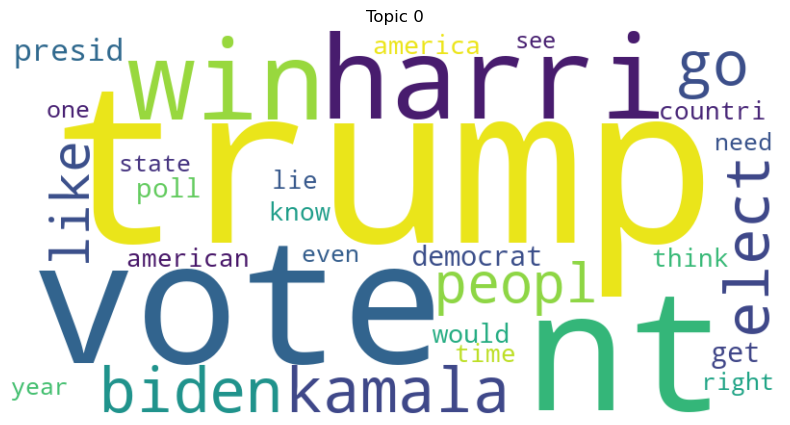

Generating word cloud for Topic 1...


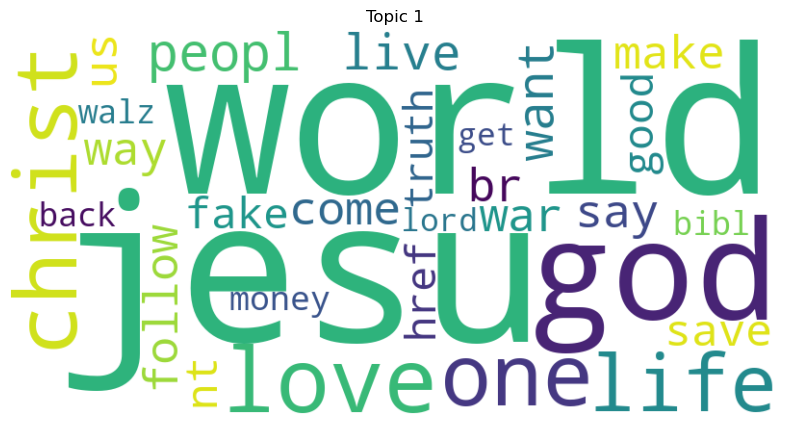

Calculating final coherence score for the optimal model...

Final Coherence Score of Optimal Model: 0.5026392047280164


In [19]:
import json
import re
import os
import pandas as pd
import nltk
import spacy
from tqdm import tqdm
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import logging
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Disable gensim's logging
logging.getLogger("gensim").setLevel(logging.WARNING)

# Download stopwords for NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load spaCy model for tokenization
nlp = spacy.load('en_core_web_sm')

# Initialize the Porter Stemmer for stemming
stemmer = PorterStemmer()

# Function to load all YouTube comments from the CSV files
def load_youtube_comments(comments_folder):
    all_comments = pd.DataFrame()

    for file_name in os.listdir(comments_folder):
        if file_name.startswith('youtube_comments_') and file_name.endswith('.csv'):
            file_path = os.path.join(comments_folder, file_name)
            try:
                video_comments = pd.read_csv(file_path)
                if not video_comments.empty:  # Check if the file is not empty
                    all_comments = pd.concat([all_comments, video_comments], ignore_index=True)
                else:
                    print(f"Skipping empty file: {file_name}")
            except pd.errors.EmptyDataError:
                print(f"Skipping file with no data: {file_name}")
    
    return all_comments

# Text cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove digits and punctuation
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # Normalize whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Tokenization, stopword removal, and stemming function
def preprocess_text(text):
    # Clean text
    cleaned_text = clean_text(text)
    # Tokenize the cleaned text using spaCy
    doc = nlp(cleaned_text)
    # Filter tokens, remove stopwords, and apply stemming
    tokens = [stemmer.stem(token.text) for token in doc if token.is_alpha and token.text not in stop_words]
    return tokens

# Load and process YouTube comments
comments_folder = 'youtube_data'  # Specify the path to your YouTube comments folder
all_comments = load_youtube_comments(comments_folder)

# Check the 'text' column for comments
comments = all_comments['text'].dropna().tolist()

# Collect all the comments into a single list for topic modeling
print("Processing YouTube comments for topic modeling...")
documents = [clean_text(comment) for comment in tqdm(comments, desc="Processing comments")]

# Preprocess all documents
print("Preprocessing the text data...")
processed_docs = [preprocess_text(doc) for doc in tqdm(documents, desc="Preprocessing documents")]

# Function to tune dictionary filtering parameters (no_below and no_above) and compute coherence
def compute_coherence_with_dictionary(processed_docs, no_below_vals, no_above_vals, limit, start=2, step=1):
    best_coherence = -1
    best_model = None
    best_params = {}
    
    for no_below in no_below_vals:
        for no_above in no_above_vals:
            print(f"\nTuning Dictionary with no_below={no_below}, no_above={no_above}")
            
            # Create a dictionary and filter extremes
            dictionary = corpora.Dictionary(processed_docs)
            dictionary.filter_extremes(no_below=no_below, no_above=no_above)

            # Create the corpus
            corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
            
            # Tune the number of topics for each dictionary configuration
            model_list, coherence_values = compute_coherence_values(dictionary, corpus, processed_docs, limit, start, step)

            # Find the best model based on coherence score
            for idx, coherence in enumerate(coherence_values):
                if coherence > best_coherence:
                    best_coherence = coherence
                    best_model = model_list[idx]
                    best_params = {'no_below': no_below, 'no_above': no_above, 'num_topics': start + idx}
                    
            print(f"Best Coherence so far: {best_coherence} with params {best_params}")

    return best_model, best_params

# Function to compute coherence score for a given model
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    print("Tuning the LDA model by varying the number of topics...")
    for num_topics in tqdm(range(start, limit, step), desc="Tuning topics"):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10, per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Set ranges for no_below, no_above, and topic count
no_below_vals = [5, 10, 20, 30]  # Minimum number of documents a word must appear in
no_above_vals = [0.1, 0.2, 0.3, 0.5, 0.6]  # Maximum proportion of documents a word can appear in
start, limit, step = 2, 15, 1  # Topic range

# Tune no_below, no_above, and number of topics
print("Starting parameter tuning for dictionary and topic number...")
best_model, best_params = compute_coherence_with_dictionary(processed_docs, no_below_vals, no_above_vals, limit, start, step)

# Show the best parameters and the topics in the optimal model
print(f"\nBest Parameters: {best_params}")
print(f"Topics found in the optimal model with {best_params['num_topics']} topics:")
for idx, topic in best_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# Generate and display word clouds for each topic in the best model
def plot_word_cloud(lda_model, num_topics):
    for i in range(num_topics):
        print(f"Generating word cloud for Topic {i}...")
        plt.figure(figsize=(10, 5))
        topic_words = dict(lda_model.show_topic(i, 30))  # Top 30 words in the topic
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {i}')
        plt.show()

# Display word clouds for the best model
print("Generating word clouds for topics in the best model...")
plot_word_cloud(best_model, best_params['num_topics'])

# Coherence score for the optimal model
print("Calculating final coherence score for the optimal model...")
coherence_model_lda = CoherenceModel(model=best_model, texts=processed_docs, dictionary=corpora.Dictionary(processed_docs), coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'\nFinal Coherence Score of Optimal Model: {coherence_lda}')

In [22]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim

# Recreate the dictionary and corpus based on the processed documents
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train the LDA model using the same dictionary and corpus
best_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_params['num_topics'], random_state=42, passes=10)

# Prepare the pyLDAvis data from the best model
def prepare_pyldavis_data(lda_model, corpus, dictionary):
    # Visualize the topics using pyLDAvis
    pyldavis_data = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
    return pyldavis_data

# Prepare pyLDAvis data
pyldavis_data = prepare_pyldavis_data(best_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(pyldavis_data)

# If you want to save the visualization to an HTML file for further viewing
pyLDAvis.save_html(pyldavis_data, 'lda_vis.html')